In [15]:
# read the data 
import pandas as pd
import numpy as np
import os
os.listdir("clean_data")
train = pd.read_csv('clean_data\cleaned_train_imputed.csv')
train.head(2)

,Unnamed: 0,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0,ID_0040R73,2010-05-14,2011-05-13,Male,30.0,2010-05-14,1,Saloon,Black,TOYOTA,Victoria Island,Lagos,Car Classic,0
1,1,ID_0046BNK,2010-11-29,2011-11-28,Female,79.0,2010-11-29,1,JEEP,Grey,TOYOTA,Victoria Island,Lagos,Car Classic,1


<AxesSubplot:ylabel='target'>

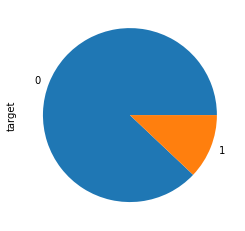

In [16]:
train.target.value_counts().plot(kind ="pie")# imbalanced data

In [17]:
# balance the data
j = 1455
x1 = train[train.target ==1]
x2 = train[train.target ==0]
x3 = x2.sample(j)
x4 = pd.concat((x1,x3))
x4 = x4.sample(2*j)
x4.target.value_counts()

1    1455
0    1455
Name: target, dtype: int64

In [18]:
# select the columns well need for the baseline
x = x4[['Gender','Age','No_Pol', 'Car_Category','Subject_Car_Colour', 'Subject_Car_Make', 
           'LGA_Name','State','ProductName']]
y = x4.target
x.dtypes

Gender                 object
Age                   float64
No_Pol                  int64
Car_Category           object
Subject_Car_Colour     object
Subject_Car_Make       object
LGA_Name               object
State                  object
ProductName            object
dtype: object

In [19]:
# clean x
from sklearn.preprocessing import LabelEncoder
for i in x.columns:
    if x[i].dtypes == "object":
        encode = LabelEncoder()
        j = encode.fit_transform(x[i])
        x[i] = j
x.head()

<ipython-input-19-a8d77ee26754>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = j


,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
366,2,43.0,2,4,1,43,8,2,1
9740,2,38.0,1,4,1,46,26,15,1
5989,2,51.0,1,4,1,43,130,39,4
1751,0,28.0,1,4,17,43,130,39,1
6542,0,32.0,1,4,19,43,97,10,1


In [33]:
# create a logistic model
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test  =  train_test_split(x,y)

In [31]:
# baseline model
model = LR()
model.fit(x_train,y_train)
preds = model.predict(x_test)

C:\Users\Maria\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
print(accuracy_score(preds,y_test))
dt = pd.DataFrame(confusion_matrix(preds,y_test),columns = ["didnt_claim","claimed"]) # terrible model
dt.index = ["didnt_claim","claimed"]
dt

0.6730769230769231


,didnt_claim,claimed
didnt_claim,237,121
claimed,117,253


In [35]:
f1_score(preds,y_test)


0.5114942528735633

# <font color = "teal"> Test the model using the test data </font>

In [23]:
os.listdir()
test = pd.read_csv('clean_data\cleaned_test_imputed.csv')
print(test.shape)
print(train.shape)
os.listdir("data")
sub  = pd.read_csv('data/SampleSubmission.csv')
sub.head(3)

(1202, 14)
(12079, 15)


,ID,target
0,ID_01QM0NU,0
1,ID_024NJLZ,0
2,ID_02NOVWQ,0


In [24]:
test_x = test[x.columns]
for i in test_x.columns:
    if test_x[i].dtypes == "object":
        encode = LabelEncoder()
        j = encode.fit_transform(test_x[i])
        test_x[i] = j

<ipython-input-24-ae0ba867ff82>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x[i] = j


In [25]:
# prediction
pred = model.predict(test_x)
pred[:10]

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [26]:
test["target"] =pred

In [29]:
final = test[["ID","target"]]
final.head()
final.to_csv("Submisions/Baseline_model_logistic_regression_08062021.csv",index = False)
final.shape

(1202, 2)